<a href="https://colab.research.google.com/github/mddsayemm/Precision-Farming/blob/main/Plant%20Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import os

# Path to the dataset folder
dataset_path = '/content/drive/MyDrive/Nonsegmented'

# Check that the dataset folder exists
assert os.path.exists(dataset_path), "Dataset folder does not exist!"


In [10]:
import os

# Path to the dataset folder
dataset_path = '/content/drive/MyDrive/Nonsegmented'

# Print top-level folder structure
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):  # Check if it's a directory
        print(f"Class: {folder}, Number of Images: {len(os.listdir(folder_path))}")


Class: Fat Hen, Number of Images: 538
Class: Maize, Number of Images: 257
Class: Scentless Mayweed, Number of Images: 607
Class: Common Chickweed, Number of Images: 713
Class: Black-grass, Number of Images: 310
Class: Loose Silky-bent, Number of Images: 766
Class: Common wheat, Number of Images: 253
Class: Charlock, Number of Images: 452
Class: Cleavers, Number of Images: 335
Class: Shepherd’s Purse, Number of Images: 274
Class: Small-flowered Cranesbill, Number of Images: 576
Class: Sugar beet, Number of Images: 463


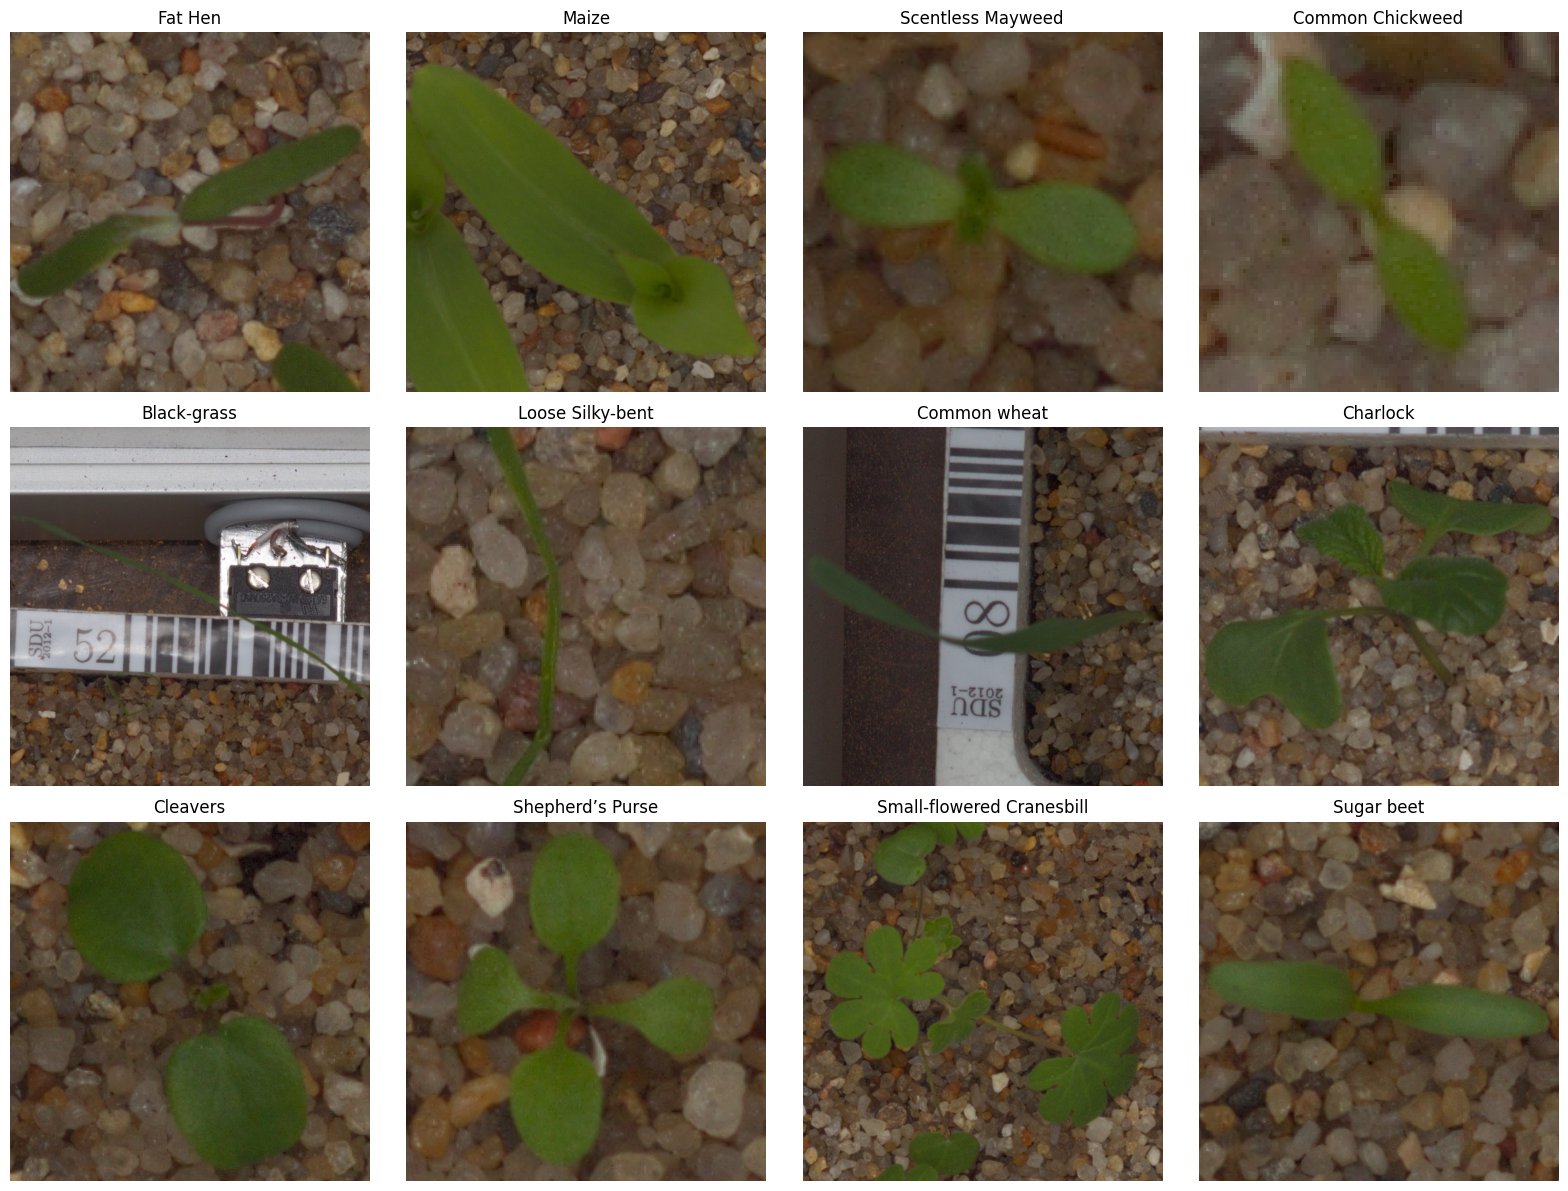

In [15]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Path to the dataset folder
dataset_path = '/content/drive/MyDrive/Nonsegmented'

# Visualize random images in a grid
def visualize_random_images_in_grid(dataset_path, cols=4):
    # Retrieve all class folders
    classes = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]
    num_classes = len(classes)

    # Determine rows based on the number of classes and columns
    rows = (num_classes + cols - 1) // cols  # Ceiling division

    # Create a figure for the grid
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
    axes = axes.flatten()

    for i, class_name in enumerate(classes):
        class_folder = os.path.join(dataset_path, class_name)
        images = os.listdir(class_folder)

        # Select a random image
        random_image = random.choice(images)
        image_path = os.path.join(class_folder, random_image)

        # Load and display the image
        img = Image.open(image_path)
        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis("off")

    # Hide unused axes
    for j in range(len(classes), len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

visualize_random_images_in_grid(dataset_path, cols=4)  # Adjust cols as needed


In [16]:
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader

# Data transformations (resize and normalize)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the dataset
dataset = datasets.ImageFolder(dataset_path, transform=transform)

# Compute lengths for train, val, test splits
train_size = int(0.7 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

# Split the dataset
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create DataLoaders for training, validation, and testing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Train size: {len(train_dataset)}, Val size: {len(val_dataset)}, Test size: {len(test_dataset)}")


Train size: 3880, Val size: 554, Test size: 1110


Train size: 3880, Val size: 554, Test size: 1110
Epoch 1/10
------------------------------


Train Loss: 0.8090, Train Accuracy: 0.7214


Val Loss: 0.6752, Val Accuracy: 0.7653
Epoch 2/10
------------------------------


Train Loss: 0.3859, Train Accuracy: 0.8603


Val Loss: 0.7778, Val Accuracy: 0.7545
Epoch 3/10
------------------------------


Train Loss: 0.3079, Train Accuracy: 0.8966


Val Loss: 0.6189, Val Accuracy: 0.8195
Epoch 4/10
------------------------------


Train Loss: 0.2058, Train Accuracy: 0.9265


Val Loss: 0.2864, Val Accuracy: 0.8953
Epoch 5/10
------------------------------


Train Loss: 0.2208, Train Accuracy: 0.9286


Val Loss: 0.5023, Val Accuracy: 0.8375
Epoch 6/10
------------------------------


Train Loss: 0.2105, Train Accuracy: 0.9325


Val Loss: 0.2732, Val Accuracy: 0.9170
Epoch 7/10
------------------------------


Train Loss: 0.1299, Train Accuracy: 0.9598


Val Loss: 0.3284, Val Accuracy: 0.8935
Epoch 8/10
------------------------------


Train Loss: 0.1240, Train Accuracy: 0.9582


Val Loss: 0.2872, Val Accuracy: 0.9097
Epoch 9/10
------------------------------


Train Loss: 0.1144, Train Accuracy: 0.9611


Val Loss: 0.2070, Val Accuracy: 0.9458
Epoch 10/10
------------------------------


Train Loss: 0.1306, Train Accuracy: 0.9613


Val Loss: 0.3072, Val Accuracy: 0.9152


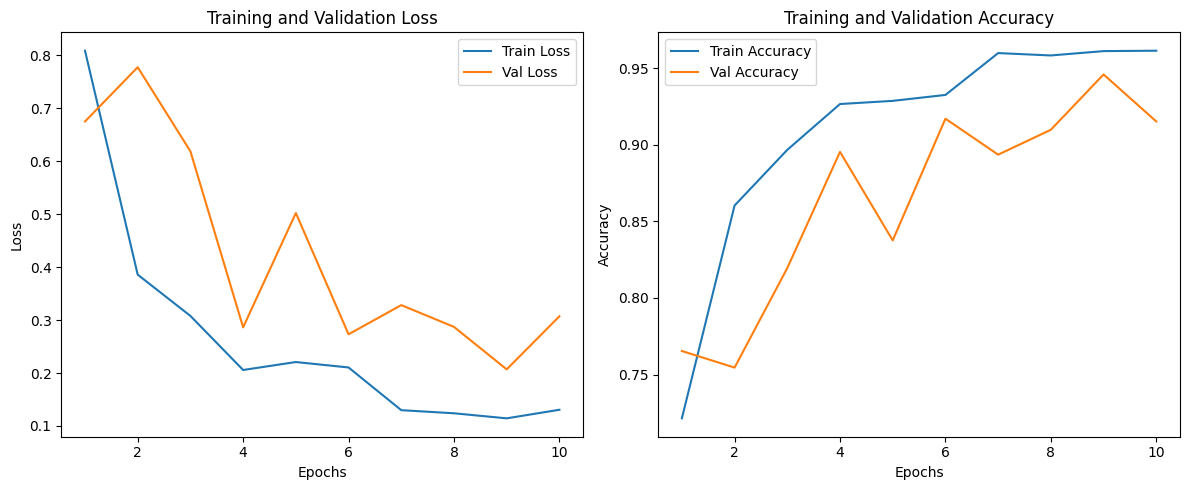

Model training complete and saved.


In [19]:
import os
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import matplotlib.pyplot as plt
from tqdm import tqdm

# Path to the dataset folder
dataset_path = '/content/drive/MyDrive/Nonsegmented'

# Check that the dataset folder exists
assert os.path.exists(dataset_path), "Dataset folder does not exist!"

# Data transformations (resize and normalize)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the dataset
dataset = datasets.ImageFolder(dataset_path, transform=transform)

# Compute lengths for train, val, test splits
train_size = int(0.7 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

# Split the dataset
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create DataLoaders for training, validation, and testing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Train size: {len(train_dataset)}, Val size: {len(val_dataset)}, Test size: {len(test_dataset)}")

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load a pretrained ResNet-18 model and modify the final layer
num_classes = len(dataset.classes)  # Number of classes in the dataset
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Update the final layer
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training and validation function
def train_and_validate(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print("-" * 30)

        # Training phase
        model.train()
        running_loss, running_corrects = 0.0, 0
        train_loader_tqdm = tqdm(train_loader, desc="Training Progress", leave=False)
        for inputs, labels in train_loader_tqdm:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass
            loss.backward()
            optimizer.step()

            # Track loss and accuracy
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels)

        train_loss = running_loss / len(train_loader.dataset)
        train_acc = running_corrects.double() / len(train_loader.dataset)
        train_losses.append(train_loss)
        train_accuracies.append(train_acc.item())
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")

        # Validation phase
        model.eval()
        running_loss, running_corrects = 0.0, 0
        val_loader_tqdm = tqdm(val_loader, desc="Validation Progress", leave=False)
        with torch.no_grad():
            for inputs, labels in val_loader_tqdm:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                # Track loss and accuracy
                running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                running_corrects += torch.sum(preds == labels)

        val_loss = running_loss / len(val_loader.dataset)
        val_acc = running_corrects.double() / len(val_loader.dataset)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc.item())
        print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}")

    # Plot training and validation metrics
    epochs = range(1, num_epochs + 1)
    plt.figure(figsize=(12, 5))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, val_losses, label="Val Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label="Train Accuracy")
    plt.plot(epochs, val_accuracies, label="Val Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

    return model

# Train the model and validate
trained_model = train_and_validate(model, criterion, optimizer, train_loader, val_loader, num_epochs=10)

# Save the trained model
torch.save(trained_model.state_dict(), "plant_classifier_resnet18.pth")
print("Model training complete and saved.")
